# データ解析基礎講座　一日目　テーマ：データの分布の様子をみる

## ヒストグラム

定量データの分布の様子を見る最も一般的な方法はヒストグラムを描くことです。
まず今回例題として用いる「都道府県別家計指標データ」を読み込み、データの先頭部分を表示させます。

In [1]:
import pandas as pd
df1 = pd.read_excel('データ解析講座一日目演習.xlsx',sheet_name='家計指標',index_col=0)
df1.head()

,県名,実収入,世帯主収入,消費支出,食料費割合,住居費割合,光熱・水道費割合,家具・家事用品費割合,被服及び履物費割合,保健医療費割合
コード,,,,,,,,,,
1,北 海 道,529.9,422.7,287.3,24.2,5.9,8.5,3.3,3.9,4.3
2,青 森 県,442.9,333.4,236.8,29.2,4.0,11.3,4.1,3.3,4.2
3,岩 手 県,522.9,403.5,289.0,24.6,5.2,8.7,3.7,3.8,5.1
4,宮 城 県,419.9,341.5,281.0,26.4,6.5,7.8,4.0,4.1,5.1
5,秋 田 県,459.0,343.4,255.2,25.6,5.4,9.6,3.7,3.1,5.4


そして、列「消費支出」についてヒストグラムを描きます。

Text(0, 0.5, '度数')

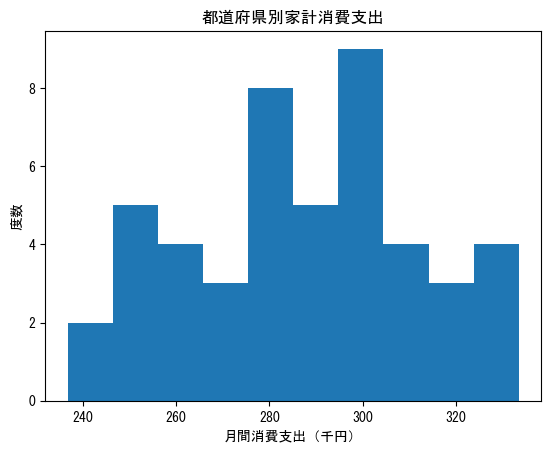

In [2]:
import matplotlib.pyplot as plt
# matplotlibで日本語表示を可能にする
from matplotlib import rcParams
rcParams['font.family']='MS Gothic'
# グラフインスタンスを定義し、グラフ本体、各種ラベルを加えていく
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df1['消費支出'])
ax.set_title('都道府県別家計消費支出')
ax.set_xlabel('月間消費支出（千円）')
ax.set_ylabel('度数')

データの行数は47です。分布の形は凸凹はありますが中央部の度数が高い「釣鐘型」に近いともいえます。

## 散布図

二つの量的変数の間の関連の様子を見たい場合は、散布図を描きます。
ここでは、自然指標の中の「年平均気温」と医療健康指標の中の「平均余命」の関連をみるために、まずデータを読み込んで横に結合します。

In [3]:
df2 = pd.read_excel('データ解析講座一日目演習.xlsx', sheet_name='自然指標', index_col=0)
df3 = pd.read_excel('データ解析講座一日目演習.xlsx', sheet_name='医療健康指標', index_col=0)
df4 = pd.merge(df2,df3,on='コード')
df4.head()

,県名_x,総面積,面積割合,森林面積割合,自然公園面積割合,可住地面積割合,年平均気温,最高気温,最低気温,年平均相対湿度,県名_y,有訴者率,通院者率,一般病院年間新入院患者数,一般病院の１日平均,一般病院の１日平均.1,標準化死亡率,平均余命1,平均余命2,平均余命3
コード,,,,,,,,,,,,,,,,,,,,
1,北 海 道,834.24,21.03,67.9,11.1,28.5,9.3,28.3,-5.9,66,北 海 道,289.3,397.6,15481.5,1373.0,1190.7,1.78,79.17,86.30,18.75
2,青 森 県,96.46,2.59,63.8,11.8,33.5,11.0,28.7,-3.0,76,青 森 県,282.2,372.7,11805.6,1011.3,843.5,2.01,77.28,85.34,17.59
3,岩 手 県,152.75,4.10,74.9,4.7,24.3,11.2,30.5,-3.6,74,岩 手 県,304.7,421.4,11824.0,949.0,793.1,1.85,78.53,85.86,18.46
4,宮 城 県,72.82,1.95,55.9,23.5,43.3,13.5,29.9,-0.8,68,宮 城 県,307.3,386.9,11529.9,849.0,642.6,1.61,79.65,86.39,18.81
5,秋 田 県,116.38,3.12,70.5,10.6,27.5,12.5,31.4,-1.7,74,秋 田 県,290.8,405.2,13553.3,1218.6,915.6,1.85,78.22,85.93,18.10


そして、「年平均気温」と「平均余命2（0歳の女性の平均余命）」の間の散布図を描きます。

Text(0, 0.5, '平均余命（女性0歳）')

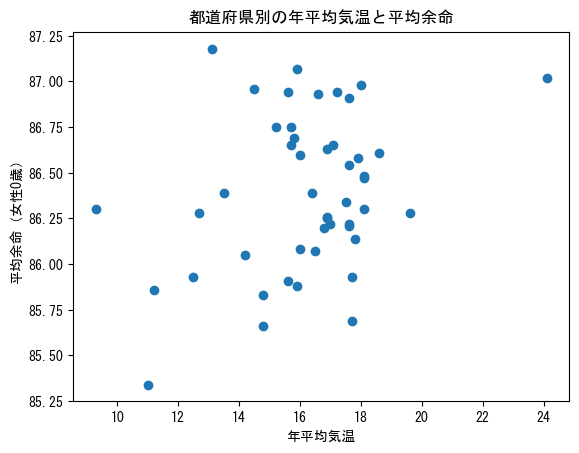

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(df4['年平均気温'], df4['平均余命2'])
ax.set_title('都道府県別の年平均気温と平均余命')
ax.set_xlabel('年平均気温')
ax.set_ylabel('平均余命（女性0歳）')

若干正の相関があるようにも見えますがあまり関連はないようです。

## クロス集計表

数量でなくカテゴリカル変数同士の関連をみるためには「クロス集計表」を作成します。
ここでは、日本の地域とドラッグストア店舗数一位の企業との関連を見てみましょう。まずデータを読み込みます。

In [5]:
df5 = pd.read_excel('データ解析講座一日目演習.xlsx', sheet_name='カテゴリカル', index_col=0)
df5.head()

,県名,地域,ドラッグストアトップ
コード,,,
1,北 海 道,北海道東北,ツルハHD
2,青 森 県,北海道東北,ウエルシアHD
3,岩 手 県,北海道東北,薬王堂
4,宮 城 県,北海道東北,ツルハHD
5,秋 田 県,北海道東北,ツルハHD


クロス集計表を出力するためには、まずpd.crosstab()でクロス集計表をデータフレームとして出力し、それをmatplotlibのtable()で表として描きます。

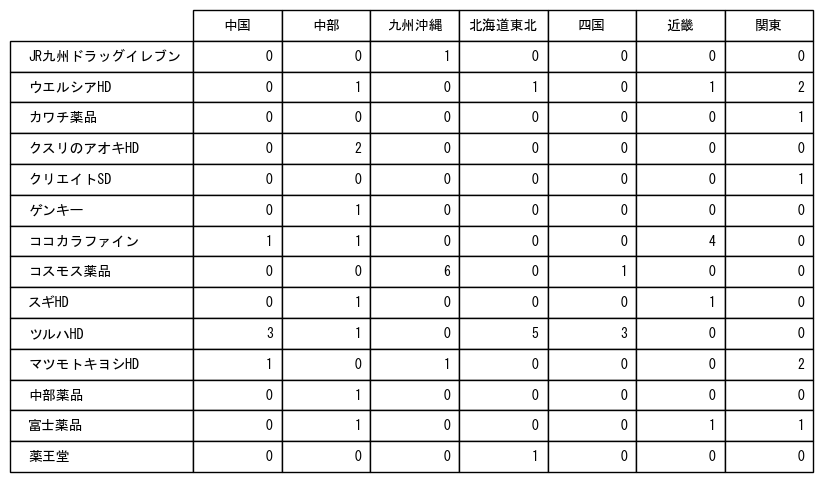

In [6]:
# クロス集計表をデータフレームに出力
df6 = pd.crosstab(df5['ドラッグストアトップ'], df5['地域'])
# データフレームの表を図として描画する
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.axis('off')
tbl = ax.table(cellText = df6.values,bbox=[0,0,1,1], colLabels = df6.columns,\
               rowLabels=df6.index)

## 箱ひげ図

１つの量的変数の分布の様子をみるには、ヒストグラムの他に「箱ひげ図」という方法もあります。箱ひげ図は、分布の位置や広がり具合、歪み方、外れ値の様子などがひと目でわかります。ここでは都道府県の面積の分布を箱ひげ図で描きます。

Text(0, 0.5, '総面積(100km2)')

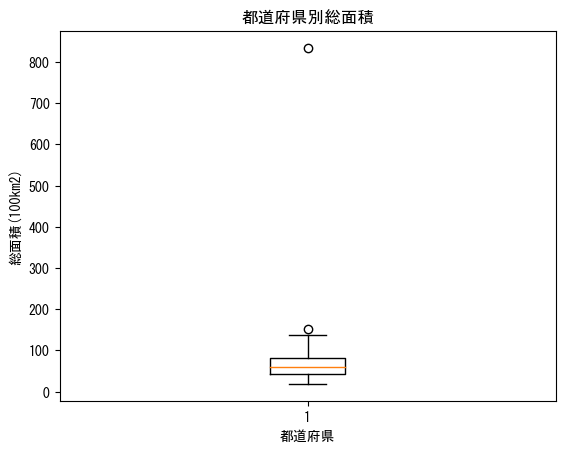

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.boxplot(df2['総面積'])
ax.set_title('都道府県別総面積')
ax.set_xlabel('都道府県')
ax.set_ylabel('総面積(100km2)')

一つだけ飛び抜けているのが北海道で、他県に比べて圧倒的に面積が大きいことがわかります。その次に大きい丸印は第二位の岩手県で、ここまでが外れ値とみなされます。

## 多変量連関図

これまでの応用として「多変量連関図」を描きます。変数が二つ以上ある場合に、各変数を縦横に並べて対比させ、同じ変数同士ならヒストグラム、違う変数同士なら散布図を描いたものを「多変量連関図」といいます。
ここでは都道府県別の家計指標について多変量連関図を描いてみます。seabornライブラリのpairplot()を用います。

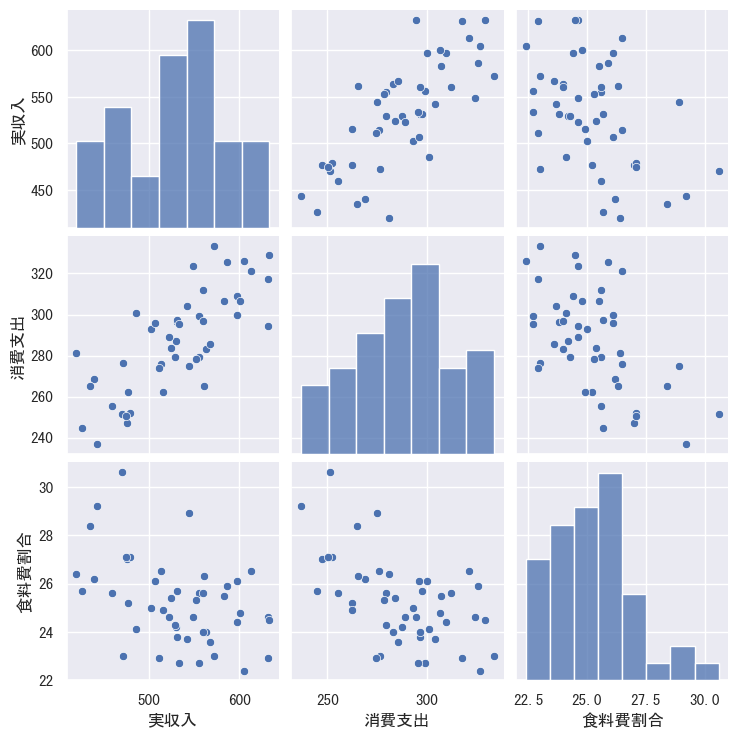

In [8]:
import seaborn as sns
# 描画する列に絞り込む
df12 = df1.loc[:,['実収入','消費支出','食料費割合']]
# seabornで日本語を表示させるための設定
sns.set(font=['MS Gothic'])
g = sns.pairplot(df12)